### Task: Make artificial RSP players using different strategies for solving Multi-armed Bandit

In [500]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

In [501]:
class RSP:    
    def __init__(self, strategy):
        self.strategy = strategy
        self.clean()
    
    
    def play(self):
        return self.strategy(self.total_reward, self.number_chosen)
    
    
    def update(self, sign, reward):
        self.total_reward[sign] += reward
        self.number_chosen[sign] += 1
        
    
    def clean(self):
        self.total_reward = [.0, .0, .0]
        self.number_chosen = [1, 1, 1]

In [502]:
def epsilon_greedy_fac(eps):
    def epsilon_greedy(total_reward, number_chosen):
        rand_num = np.random.random()
        if eps > rand_num: 
            return random.choice(range(len(total_reward)))
        else:
            all_rewards = list( (((t_reward /  n_chosen), i) for (i, t_reward), n_chosen in 
                                            zip(enumerate(total_reward), number_chosen))
                              )
            max_reward = max(all_rewards)[0]
            return random.choice(list((i for reward, i in all_rewards if reward == max_reward)))
    return epsilon_greedy

In [503]:
def ubc_1(total_reward, number_chosen):
    n = sum(number_chosen)
    all_rewards = list(((t_reward / n_chosen  + math.sqrt(2 * math.log(n) / n_chosen), i)
                          for (i, t_reward), n_chosen in zip(enumerate(total_reward), number_chosen)))
    max_reward = max(all_rewards)[0]
    return random.choice(list((i for reward, i in all_rewards if reward == max_reward)))

In [504]:
def game_res(act_1, act_2):
    if (act_1 + 1) % 3  == act_2:
        return 0
    if act_1 == act_2:
        return 1
    return 2

In [556]:
result_to_reward = [1.0, 0.1, 0.0]

In [557]:
def run_game(player_one, player_two, n_games=50):
    player_one_stats = [0, 0, 0]
    for _ in range(n_games):
        act_1 = player_one.play()
        act_2 = player_two.play()
        res = game_res(act_1, act_2)
        player_one_stats[res] += 1
        player_one.update(act_1, result_to_reward[res])
        player_two.update(act_2, result_to_reward[len(player_one_stats) - 1 - res])
    player_one.clean()
    player_two.clean()
    return player_one_stats

In [558]:
player_eps_0 = RSP(epsilon_greedy_fac(0.0))
player_eps_001 = RSP(epsilon_greedy_fac(0.01))
player_eps_01 = RSP(epsilon_greedy_fac(0.1))
player_eps_02 = RSP(epsilon_greedy_fac(0.2))
player_eps_03 = RSP(epsilon_greedy_fac(0.3))
player_eps_04 = RSP(epsilon_greedy_fac(0.4))
player_eps_05 = RSP(epsilon_greedy_fac(0.5))
player_eps_06 = RSP(epsilon_greedy_fac(0.6))
player_eps_07 = RSP(epsilon_greedy_fac(0.7))
player_eps_08 = RSP(epsilon_greedy_fac(0.8))
player_eps_09 = RSP(epsilon_greedy_fac(0.9))
player_eps_1 = RSP(epsilon_greedy_fac(1))

player_ucb_1 = RSP(ubc_1)

In [559]:
n_iterations = 20
n_games = 1000

In [560]:
def play_games(player_1, player_2):
    for _ in range(n_iterations):
        stats = run_game(player_1, player_2, n_games=n_games)
        plt.plot([1, 2, 3], stats)
    plt.show()

### UCB-1 VS. Epsilon-greedy

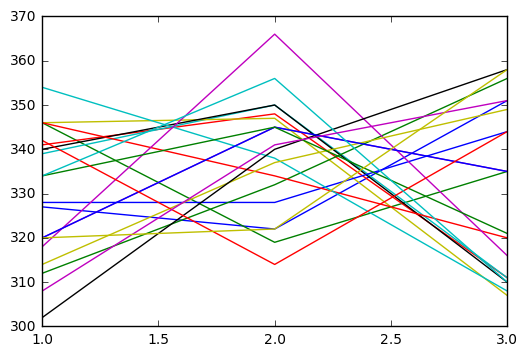

In [561]:
play_games(player_ucb_1, player_eps_1)

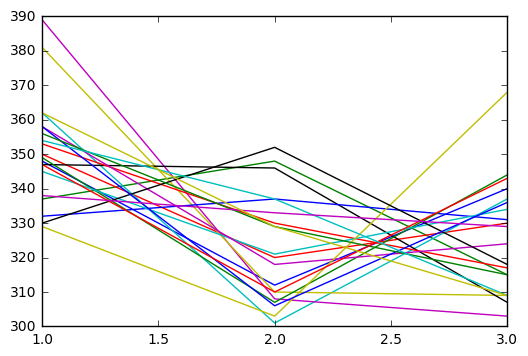

In [562]:
play_games(player_ucb_1, player_eps_08)

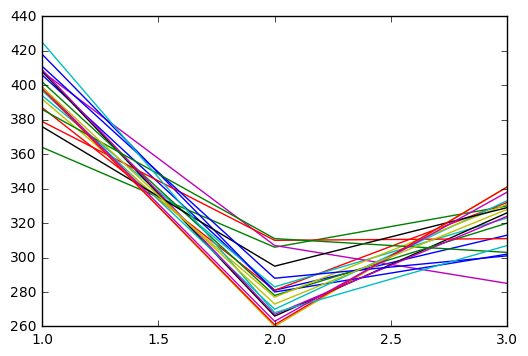

In [563]:
play_games(player_ucb_1, player_eps_06)

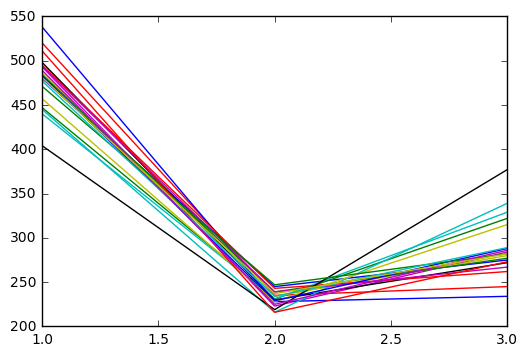

In [564]:
play_games(player_ucb_1, player_eps_04)

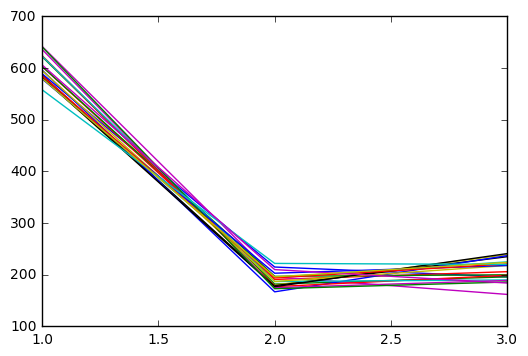

In [565]:
play_games(player_ucb_1, player_eps_02)

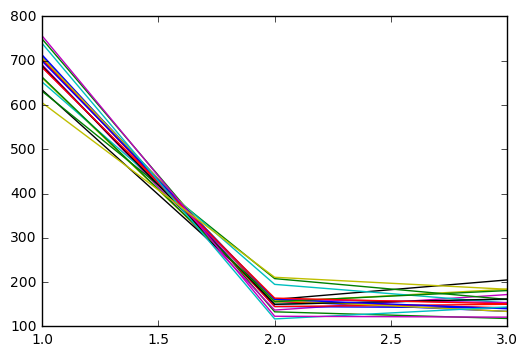

In [566]:
play_games(player_ubc_1, player_eps_01)

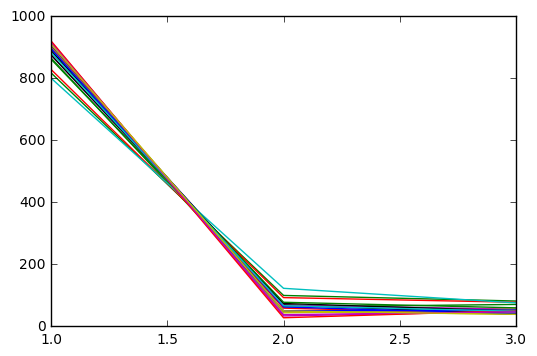

In [567]:
play_games(player_ubc_1, player_eps_001)

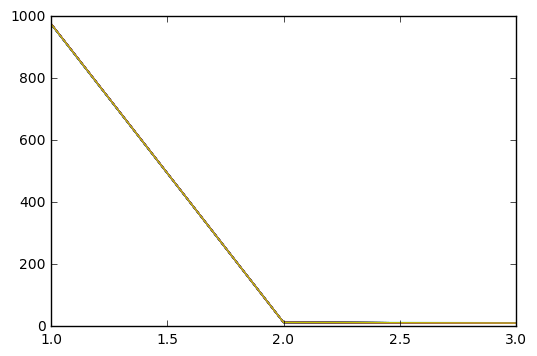

In [568]:
play_games(player_ubc_1, player_eps_0)

### Epsilon-greedy VS. Epsilon-greedy

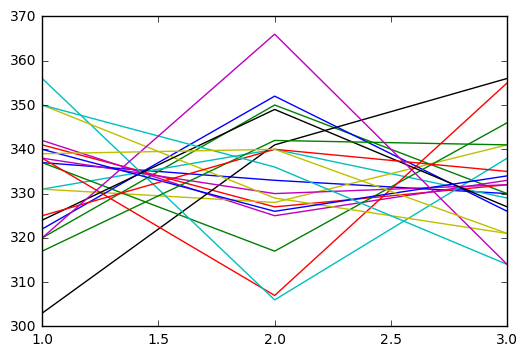

In [569]:
play_games(player_eps_01, player_eps_1)

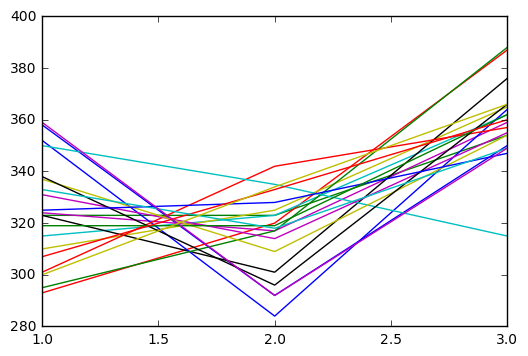

In [570]:
play_games(player_eps_01, player_eps_09)

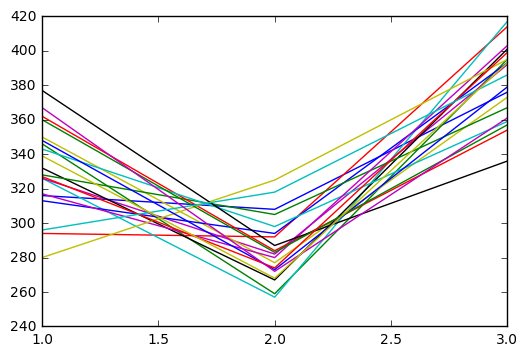

In [571]:
play_games(player_eps_01, player_eps_08)

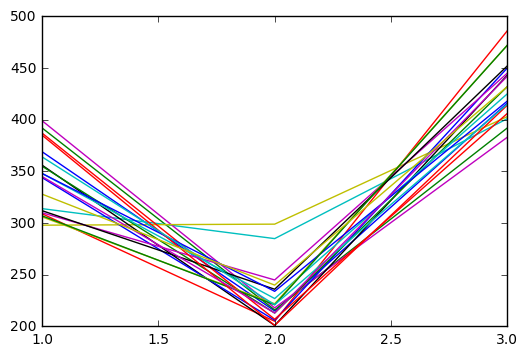

In [572]:
play_games(player_eps_01, player_eps_06)

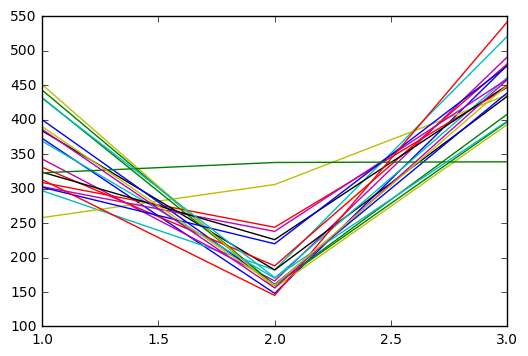

In [573]:
play_games(player_eps_01, player_eps_04)

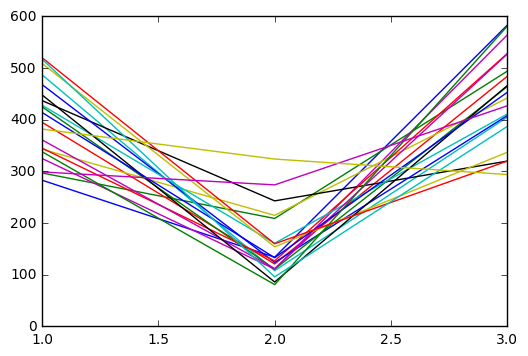

In [574]:
play_games(player_eps_01, player_eps_02)

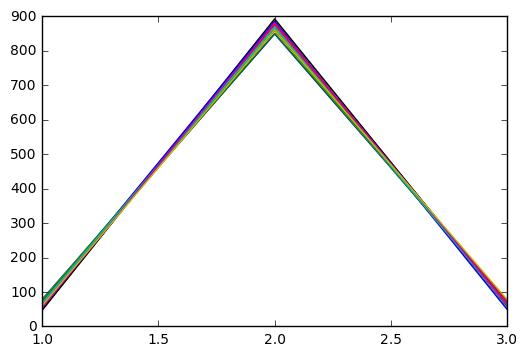

In [575]:
play_games(player_eps_01, player_eps_01)

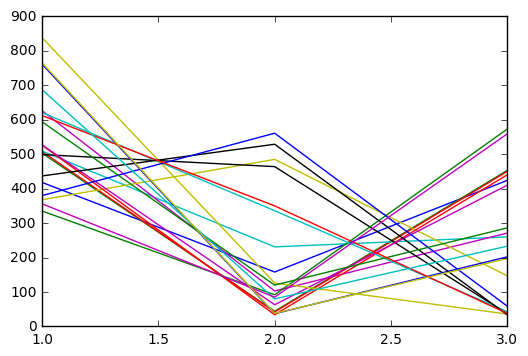

In [576]:
play_games(player_eps_01, player_eps_001)

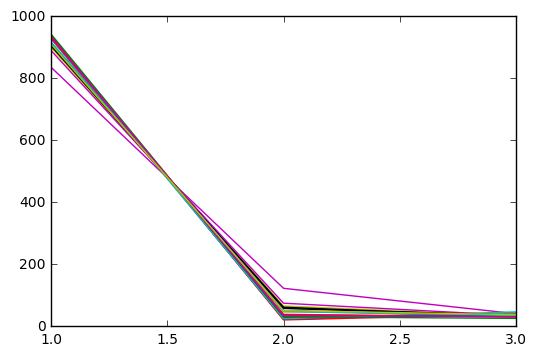

In [577]:
play_games(player_eps_01, player_eps_0)